In [4]:
# Libraries

import pandas as pd
import numpy as np

In [118]:
#Importing the necessary libraries we will be using

%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
#Loading the Dataset
df_raw_train = pd.read_csv('Train.csv')
df_raw_test = pd.read_csv('Test.csv')

In [7]:
df_raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [8]:
df_raw_train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [13]:
df_raw_train.duplicated().value_counts()

False    29050
True       401
dtype: int64

In [15]:
df_raw_train.drop_duplicates(inplace = True)

In [16]:
df_raw_train.shape

(29050, 12)

In [119]:
df_raw_test.duplicated().value_counts()

False    66250
True      2470
dtype: int64

In [18]:
#df_raw_test.drop_duplicates(inplace = True)

In [120]:
df_raw_test.shape

(68720, 11)

In [20]:
df_raw_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [27]:
df_raw_train['POSTED_BY'].value_counts()

Dealer     17961
Owner      10470
Builder      619
Name: POSTED_BY, dtype: int64

In [28]:
df_raw_train.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.364299,-0.042503,-0.004233,-1.000000,-0.346085,0.006420,-0.000850,0.054618
RERA,0.364299,1.000000,0.008403,-0.006251,-0.364299,-0.270268,0.103617,-0.065424,0.067314
BHK_NO.,-0.042503,0.008403,1.000000,0.005337,0.042503,0.013146,0.067711,0.046988,0.113654
SQUARE_FT,-0.004233,-0.006251,0.005337,1.000000,0.004233,0.001768,-0.012646,0.000813,0.409571
READY_TO_MOVE,-1.000000,-0.364299,0.042503,0.004233,1.000000,0.346085,-0.006420,0.000850,-0.054618
RESALE,-0.346085,-0.270268,0.013146,0.001768,0.346085,1.000000,0.023274,0.015824,-0.203275
LONGITUDE,0.006420,0.103617,0.067711,-0.012646,-0.006420,0.023274,1.000000,-0.156784,-0.030505
LATITUDE,-0.000850,-0.065424,0.046988,0.000813,0.000850,0.015824,-0.156784,1.000000,-0.017813
TARGET(PRICE_IN_LACS),0.054618,0.067314,0.113654,0.409571,-0.054618,-0.203275,-0.030505,-0.017813,1.000000


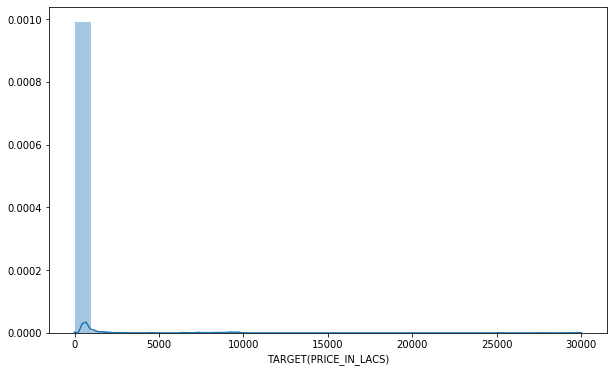

In [48]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.distplot(df_raw_train['TARGET(PRICE_IN_LACS)'],bins=30)

In [45]:
df_train_pricechk = df_raw_train.loc[df_raw_train['TARGET(PRICE_IN_LACS)'] > 5000]

In [46]:
df_train_pricechk 

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
40,Dealer,1,1,1,BHK,40606.19568,0,0,"Kanjur Marg (East),Lalitpur",24.690280,78.418890,9110.0
294,Builder,1,1,3,BHK,106469.00270,0,0,"Vishrantwadi,Lalitpur",24.690280,78.418890,9480.0
554,Dealer,1,1,3,BHK,113785.55800,0,0,"Dabolim,Goa",15.384909,73.850001,7280.0
722,Builder,0,0,3,BHK,134884.56640,1,0,"Deolali Camp,Maharashtra",19.908529,73.831516,7420.0
1041,Dealer,1,1,3,BHK,83212.07712,0,0,"Chinchwad,Pune",18.627000,73.782900,9150.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28049,Builder,1,1,3,BHK,158840.48140,0,0,"KR Puram,Bangalore",13.010349,77.712151,9370.0
28096,Dealer,0,1,1,BHK,45355.30671,1,0,"Kolshet Road,Mumbai",19.249861,72.963866,6440.0
28821,Dealer,1,1,3,BHK,93793.84781,0,0,"KR Puram,Bangalore",13.010349,77.712151,8690.0
28925,Dealer,0,1,2,BHK,63986.01399,1,0,"Kolshet Road,Lalitpur",24.690280,78.418890,9150.0


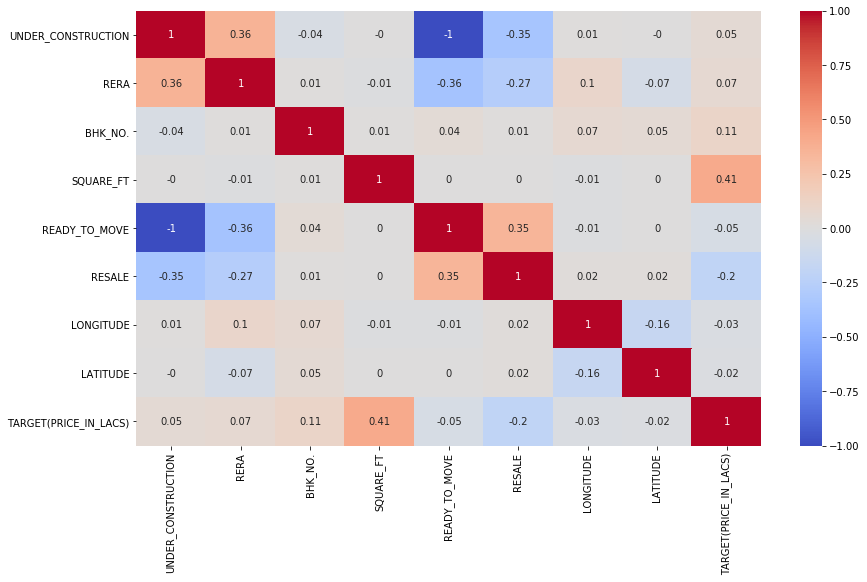

In [47]:
# Plot the correlation heatmap
plt.figure(figsize=(14, 8))
corr_matrix = df_raw_train.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

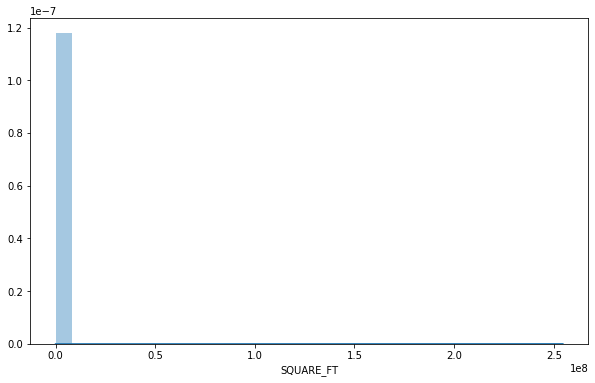

In [50]:
plt.figure(figsize=(10, 6))
sns.distplot(df_raw_train['SQUARE_FT'],bins=30)

In [51]:
Df_sq_ft = df_raw_train[["BHK_OR_RK","SQUARE_FT"]]

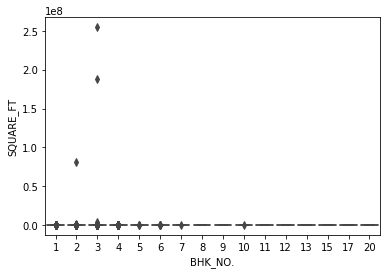

In [55]:
ax = sns.boxplot(x="BHK_NO.", y="SQUARE_FT", data=df_raw_train)


In [57]:
df_raw_train['SQUARE_FT'].map(len).value_counts()

TypeError: object of type 'float' has no len()

In [58]:
df_raw_train.dtypes


POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [60]:
df_raw_train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29050.000000,29050.000000,29050.000000,2.905000e+04,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000
mean,0.178967,0.315869,2.390809,2.003171e+04,0.821033,0.930361,21.270272,76.829585,141.712677
std,0.383332,0.464869,0.880677,1.914411e+06,0.383332,0.254541,6.195973,10.567572,650.055763
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000000e+02,1.000000,1.000000,18.452663,73.794800,38.000000
50%,0.000000,0.000000,2.000000,1.172742e+03,1.000000,1.000000,20.631532,77.322873,61.750000
75%,0.000000,1.000000,3.000000,1.550169e+03,1.000000,1.000000,26.886881,77.912934,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [64]:
df_raw_train['SQUARE_FT'].max()
df_raw_train['SQUARE_FT'].median()
df_raw_train['SQUARE_FT'].min()

3.0

In [ ]:
#removing outliers

In [66]:
from scipy import stats
import numpy as np


In [92]:
# Import zscore
from scipy.stats import zscore
# df_raw_train: standardized
standardized = df_raw_train.groupby('BHK_NO.')['SQUARE_FT'].transform(zscore)
# Construct a Boolean Series to identify outliers: outliers
outliers = (standardized < -3)|(standardized > 3)
# Filter df_raw_train by the outliers: gm_outliers
df_outliers = df_raw_train.loc[outliers]
# Print df_outliers
#print(df_outliers)


      POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK     SQUARE_FT  \
40       Dealer                   1     1        1       BHK  4.060620e+04   
373       Owner                   0     0        4       BHK  4.333333e+05   
1448     Dealer                   0     0        5       BHK  1.193252e+04   
3754     Dealer                   1     1        1       BHK  4.272398e+04   
4220      Owner                   0     1        7       BHK  4.411765e+04   
5025     Dealer                   0     1        1       BHK  4.530248e+04   
6318     Dealer                   1     1        4       BHK  1.949979e+05   
6462     Dealer                   1     1        4       BHK  2.300000e+05   
7309     Dealer                   0     1        1       BHK  4.528571e+04   
9486     Dealer                   0     1        1       BHK  3.589145e+04   
10432    Dealer                   0     1        1       BHK  4.530248e+04   
10745     Owner                   0     0        3       BHK  2.

In [94]:
df_outliers.head(32)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
40,Dealer,1,1,1,BHK,4.060620e+04,0,0,"Kanjur Marg (East),Lalitpur",24.690280,78.418890,9110.0
373,Owner,0,0,4,BHK,4.333333e+05,1,1,"Mulanthuruthy,Kochi",9.893479,76.408774,65.0
1448,Dealer,0,0,5,BHK,1.193252e+04,1,0,"Sector-50 Gurgaon,Gurgaon",28.423082,77.056406,870.0
3754,Dealer,1,1,1,BHK,4.272398e+04,0,0,"Kanjur Marg (East),Maharashtra",18.960000,72.820000,9900.0
4220,Owner,0,1,7,BHK,4.411765e+04,1,1,"Bodhan,Nizamabad",18.670000,77.900000,120.0
5025,Dealer,0,1,1,BHK,4.530248e+04,1,0,"Kolshet Road,Maharashtra",19.249861,72.963866,6500.0
6318,Dealer,1,1,4,BHK,1.949979e+05,0,0,"Sector-88 Mohali,Mohali",30.684523,76.691728,9200.0
6462,Dealer,1,1,4,BHK,2.300000e+05,0,0,"Mullanpur,Chandigarh",30.735280,76.791110,9200.0
7309,Dealer,0,1,1,BHK,4.528571e+04,1,0,"Kolshet Road,Mumbai",19.249861,72.963866,6340.0
9486,Dealer,0,1,1,BHK,3.589145e+04,1,0,"Chembur (East),Lalitpur",19.058710,72.899690,8610.0


In [96]:
df_raw_train = df_raw_train.loc[~((df_raw_train['BHK_NO.'].isin(df_outliers['BHK_NO.']))&(df_raw_train.SQUARE_FT.isin(df_outliers['SQUARE_FT']))),:]

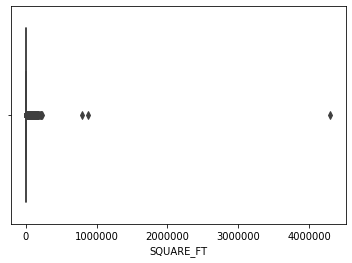

In [97]:
import seaborn as sns
sns.boxplot(x=df_raw_train['SQUARE_FT'])

In [106]:
df_raw_train['SQUARE_FT'].max()


875000.0

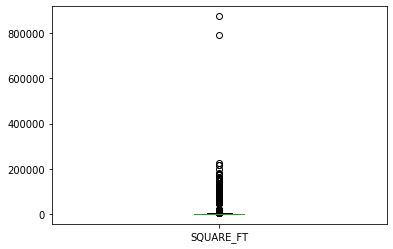

In [107]:
df_raw_train["SQUARE_FT"].plot(kind = "box")

In [105]:
df_raw_train = df_raw_train.loc[~(df_raw_train['SQUARE_FT']==4300000.0)]

In [108]:
df_raw_train["source"] = 'train'

In [159]:
df_raw_test["source"] = 'test'

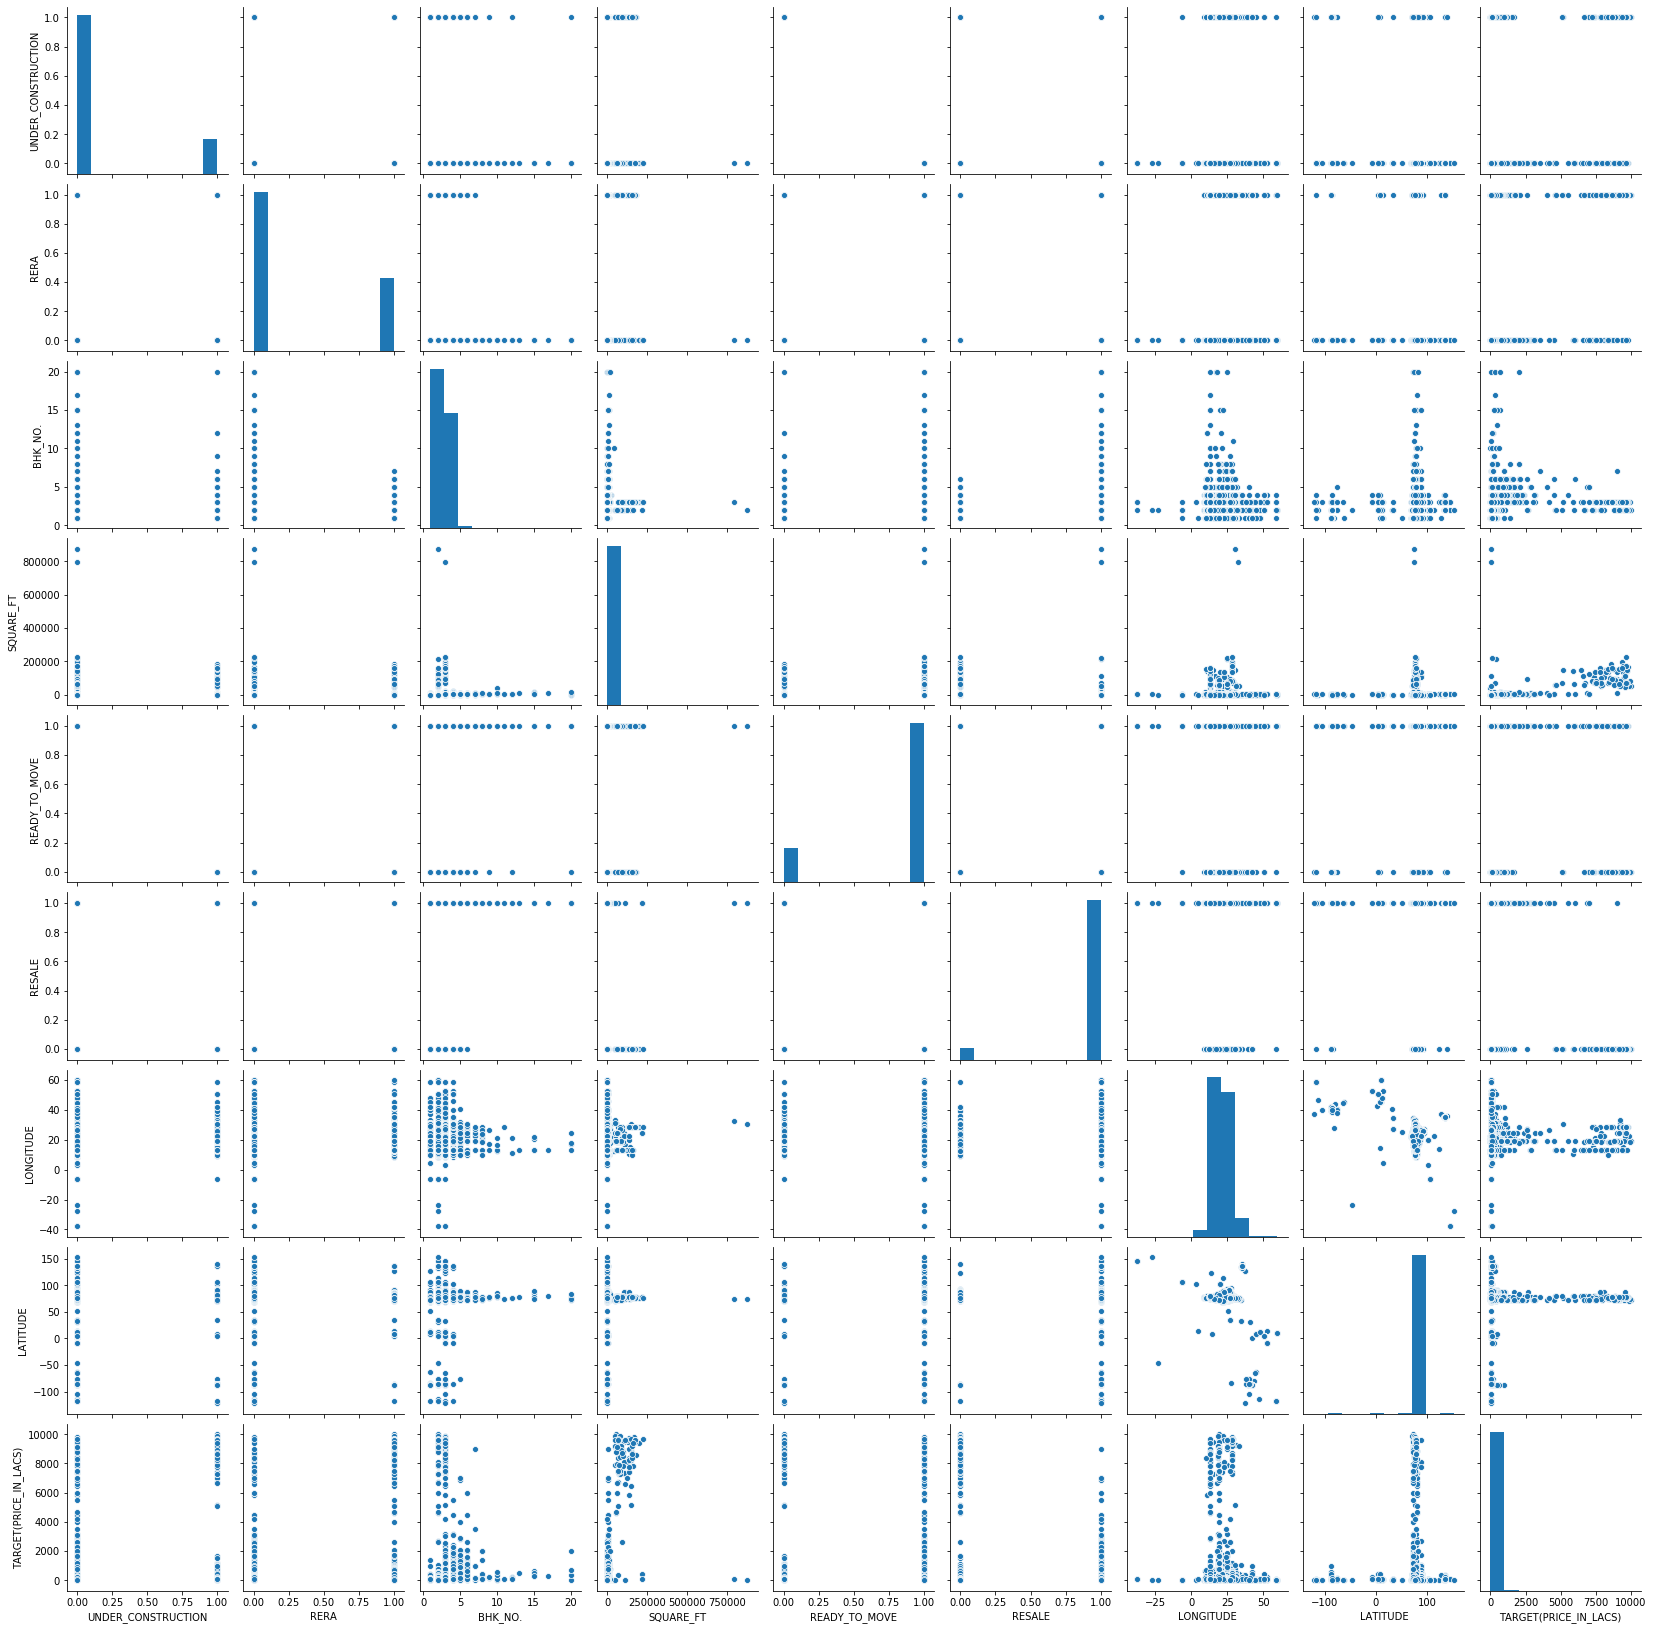

In [110]:
sns.pairplot(df_raw_train)

In [111]:
df_raw_train.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363913,-0.043194,0.026339,-1.000000,-0.345497,0.005743,-0.000845,0.055473
RERA,0.363913,1.000000,0.008783,0.029600,-0.363913,-0.268544,0.103391,-0.065249,0.070846
BHK_NO.,-0.043194,0.008783,1.000000,0.072108,0.043194,0.013191,0.067352,0.046752,0.134309
SQUARE_FT,0.026339,0.029600,0.072108,1.000000,-0.026339,-0.131980,0.006253,0.000985,0.594984
READY_TO_MOVE,-1.000000,-0.363913,0.043194,-0.026339,1.000000,0.345497,-0.005743,0.000845,-0.055473
RESALE,-0.345497,-0.268544,0.013191,-0.131980,0.345497,1.000000,0.024433,0.015650,-0.206066
LONGITUDE,0.005743,0.103391,0.067352,0.006253,-0.005743,0.024433,1.000000,-0.156917,-0.033450
LATITUDE,-0.000845,-0.065249,0.046752,0.000985,0.000845,0.015650,-0.156917,1.000000,-0.020985
TARGET(PRICE_IN_LACS),0.055473,0.070846,0.134309,0.594984,-0.055473,-0.206066,-0.033450,-0.020985,1.000000


In [112]:
df_raw_train["BHK_NO."].unique()

array([ 2,  3,  1,  4,  5,  6, 12,  8, 20, 10,  9,  7, 13, 17, 15, 11])

In [160]:
df_all=pd.concat([df_raw_train,df_raw_test])

In [161]:
df_all.shape

(97736, 13)

In [162]:
df_all.isna().sum()

POSTED_BY                    0
UNDER_CONSTRUCTION           0
RERA                         0
BHK_NO.                      0
BHK_OR_RK                    0
SQUARE_FT                    0
READY_TO_MOVE                0
RESALE                       0
ADDRESS                      0
LONGITUDE                    0
LATITUDE                     0
TARGET(PRICE_IN_LACS)    68720
source                       0
dtype: int64

In [163]:
df_raw_test.duplicated().value_counts()

False    66250
True      2470
dtype: int64

In [164]:
#Multicoliearrity
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_all.select_dtypes(include=np.number).drop(columns=["TARGET(PRICE_IN_LACS)"])
vif_data = pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

              feature        VIF
0  UNDER_CONSTRUCTION  17.867267
1                RERA   1.205645
2             BHK_NO.   1.010449
3           SQUARE_FT   1.000147
4       READY_TO_MOVE  82.433760
5              RESALE   1.176068
6           LONGITUDE   1.039858
7            LATITUDE   1.029987


In [165]:
df_all["RESALE"].value_counts()

1    91165
0     6571
Name: RESALE, dtype: int64

In [166]:
# Since 91000 out of 97770 records are having values as 1 so the influence is minimal, so dropping this col
df_all.drop(columns=['RESALE'],inplace=True)

In [167]:
x=df_all.select_dtypes(include=np.number).drop(columns=["TARGET(PRICE_IN_LACS)"])
vif_data = pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

              feature        VIF
0  UNDER_CONSTRUCTION  15.942051
1                RERA   1.170628
2             BHK_NO.   1.010443
3           SQUARE_FT   1.000066
4       READY_TO_MOVE  68.487747
5           LONGITUDE   1.037944
6            LATITUDE   1.029941


In [130]:
# UNDER_CONSTRUCTION & READY_TO_MOVE are mutually exclusive, so we can remove one of the columns 

In [168]:
df_all.drop(columns=['UNDER_CONSTRUCTION'],inplace=True)

In [169]:
x=df_all.select_dtypes(include=np.number).drop(columns=["TARGET(PRICE_IN_LACS)"])
vif_data = pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

         feature        VIF
0           RERA   1.659322
1        BHK_NO.   8.295947
2      SQUARE_FT   1.000377
3  READY_TO_MOVE   6.034397
4      LONGITUDE  10.623462
5       LATITUDE  16.366412


In [170]:
df_all.head()

,POSTED_BY,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),source
0,Owner,0,2,BHK,1300.236407,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,train
1,Dealer,0,2,BHK,1275.000000,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,train
2,Owner,0,2,BHK,933.159722,1,"Jigani,Bangalore",12.778033,77.632191,43.0,train
3,Owner,1,2,BHK,929.921143,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,train
4,Dealer,0,2,BHK,999.009247,0,"New Town,Kolkata",22.592200,88.484911,60.5,train


In [171]:
df_all["POSTED_BY"].value_counts()

Dealer     60374
Owner      35382
Builder     1980
Name: POSTED_BY, dtype: int64

In [172]:
df_all['ADDRESS']

0                     Ksfc Layout,Bangalore
1                 Vishweshwara Nagar,Mysore
2                          Jigani,Bangalore
3               Sector-1 Vaishali,Ghaziabad
4                          New Town,Kolkata
                        ...                
68715                Thane West,Maharashtra
68716              Sector-66A Mohali,Mohali
68717                    Balkum,Maharashtra
68718                         Hadapsar,Pune
68719    Hiranandani Gardens - Powai,Mumbai
Name: ADDRESS, Length: 97736, dtype: object

In [173]:
# Spliting city from address
def find_city(address):
    city = address.split(',')[-1]
    return city

In [174]:
df_all['ADDRESS'].apply(lambda x:find_city(x))

0          Bangalore
1             Mysore
2          Bangalore
3          Ghaziabad
4            Kolkata
            ...     
68715    Maharashtra
68716         Mohali
68717    Maharashtra
68718           Pune
68719         Mumbai
Name: ADDRESS, Length: 97736, dtype: object

In [175]:
df_all["CITY"]=df_all['ADDRESS'].apply(lambda x:find_city(x))

In [139]:
# Spliting locality from address
def find_locality(address):
    locality = address.split(',')[-2]
    return locality

In [176]:
df_all['LOCALITY']=df_all['ADDRESS'].apply(lambda x:find_locality(x))

In [177]:
df_all.drop(columns=['ADDRESS'],inplace=True)

In [178]:
df_all['BHK_RK']=np.where((df_all["BHK_OR_RK"]=='BHK'),1,0)

In [179]:
df_all.drop(columns=['BHK_OR_RK'],inplace=True)

In [180]:
df_all["BHK_RK"].value_counts()

1    97654
0       82
Name: BHK_RK, dtype: int64

In [181]:
df_all.corr()

,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),BHK_RK
RERA,1.000000,0.009293,-0.000723,-0.363642,0.103265,-0.069774,0.070846,-0.005372
BHK_NO.,0.009293,1.000000,0.005740,0.037223,0.068964,0.049618,0.134309,0.046316
SQUARE_FT,-0.000723,0.005740,1.000000,-0.000609,-0.005151,0.000279,0.594984,0.000437
READY_TO_MOVE,-0.363642,0.037223,-0.000609,1.000000,-0.009616,-0.002140,-0.055473,0.019868
LONGITUDE,0.103265,0.068964,-0.005151,-0.009616,1.000000,-0.147245,-0.033450,-0.008705
LATITUDE,-0.069774,0.049618,0.000279,-0.002140,-0.147245,1.000000,-0.020985,-0.000100
TARGET(PRICE_IN_LACS),0.070846,0.134309,0.594984,-0.055473,-0.033450,-0.020985,1.000000,0.004872
BHK_RK,-0.005372,0.046316,0.000437,0.019868,-0.008705,-0.000100,0.004872,1.000000


In [182]:
df_all_category_cols=df_all.select_dtypes(exclude=np.number).columns
df_all_num_cols = df_all.select_dtypes(include=np.number).columns

In [183]:
df_all_category_cols

Index(['POSTED_BY', 'source', 'CITY', 'LOCALITY'], dtype='object')

In [184]:
df_all_num_cols

Index(['RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)', 'BHK_RK'],
      dtype='object')

In [185]:
df_all.groupby(by='CITY').CITY.value_counts().sort_values().head(60)

CITY          CITY        
Jhajjar       Jhajjar         1
Kaushambi     Kaushambi       1
Rupnagar      Rupnagar        1
Betul         Betul           1
Bhadrak       Bhadrak         1
Dhar          Dhar            1
Rayagada      Rayagada        1
Rajpura       Rajpura         1
Mandsaur      Mandsaur        1
Morena        Morena          1
Raebareli     Raebareli       1
Nagapattinam  Nagapattinam    1
Gadarwara     Gadarwara       1
Hassan        Hassan          1
Firozabad     Firozabad       1
Faizabad      Faizabad        1
Chittorgarh   Chittorgarh     1
Phagwara      Phagwara        1
Contai        Contai          1
Namakkal      Namakkal        1
Pathankot     Pathankot       1
Palani        Palani          1
Dindigul      Dindigul        1
Palanpur      Palanpur        1
Patan         Patan           1
Dhenkanal     Dhenkanal       1
Pali          Pali            1
Nagaur        Nagaur          1
Barmer        Barmer          1
Khandwa       Khandwa         1
Shimoga      

In [186]:
df_all['LOCALITY'].value_counts().head(60)

Zirakpur                    1704
Raj Nagar Extension          728
Whitefield                   670
Thane West                   594
Mulund (West)                505
Kolshet Road                 498
Ghodbunder Road              496
Sector-137 Noida             467
Kharghar                     461
New Town                     461
Rajarhat                     458
Hiranandani Estate           440
Kandivali (East)             418
Jagatpura                    399
Kanjur Marg (East)           384
Chembur (East)               363
Noida Extension              359
Chembur                      356
Mira Road                    350
Sector-75 Noida              345
Balkum                       342
Sector 86 Faridabad          333
Baner                        333
Goregaon (East)              330
Sector-150 Noida             328
Thanisandra                  327
Mira Road East               321
Ajmer Road                   311
Sarjapur Road                306
Dombivli (East)              304
Manpada   

In [187]:
data_to_encode = df_all[df_all_category_cols].drop(columns=['source','CITY','LOCALITY'])

In [188]:
df_category_encode = pd.get_dummies(data_to_encode)

In [189]:
df_final = pd.concat([df_category_encode,df_all[df_all_num_cols],df_all[["source",'CITY','LOCALITY']]],axis=1)

In [190]:
df_train_preprocessed=df_final[df_final['source']=='train']

In [191]:
del df_train_preprocessed['source']

In [192]:
df_train_preprocessed.shape

(29016, 13)

In [199]:
df_test_preprocessed=df_final[df_final['source']=='test']

In [201]:
del df_test_preprocessed['source']

In [202]:
df_test_preprocessed.shape

(68720, 13)

In [203]:
df_test_preprocessed.head()

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),BHK_RK,CITY,LOCALITY
0,0,0,1,0,1,545.171340,1,21.262000,73.047700,NaN,1,Surat,Kamrej
1,0,1,0,1,2,800.000000,0,18.966114,73.148278,NaN,1,Lalitpur,Panvel
2,0,1,0,0,2,1257.096513,1,22.592200,88.484911,NaN,1,Kolkata,New Town
3,0,1,0,0,3,1400.329489,1,26.988300,75.584600,NaN,1,Jaipur,Kalwar Road
4,0,0,1,0,1,430.477830,1,22.700000,72.870000,NaN,1,Nadiad,Mai Mandir


In [196]:
df_train_preprocessed.head()

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),BHK_RK,CITY,LOCALITY
0,0,0,1,0,2,1300.236407,1,12.969910,77.597960,55.0,1,Bangalore,Ksfc Layout
1,0,1,0,0,2,1275.000000,1,12.274538,76.644605,51.0,1,Mysore,Vishweshwara Nagar
2,0,0,1,0,2,933.159722,1,12.778033,77.632191,43.0,1,Bangalore,Jigani
3,0,0,1,1,2,929.921143,1,28.642300,77.344500,62.5,1,Ghaziabad,Sector-1 Vaishali
4,0,1,0,0,2,999.009247,0,22.592200,88.484911,60.5,1,Kolkata,New Town


In [204]:
df_train_preprocessed.to_csv("train_housing_price_preprocessed.csv",index=False)
df_test_preprocessed.to_csv("test_housing_price_preprocessed.csv",index=False)